## Inteligência Artificial 2022.1
#### Trabalho 1
#### Universidade Federal de São Carlos (UFSCar) - campus Sorocaba

Professora responsável: Profa. Dra. Katti Faceli<br>
Grupo 10<br>

Integrantes do grupo:<br>
Arthur Felipe Bravo Pita            RA 770987<br>
Matheus Vargas Volpon Berto         RA 771051<br>
Pedro Henrique Mendes               RA 771056<br>
Wilson Leonardo Marcielo Chaves     RA 771068<br>

In [1]:
from algoritmos import *

# K-médias

In [ ]:
k_means('../datasets/c2ds1-2sp.txt', k=3, it=3)

In [ ]:
hierarquic_link('../datasets/test.txt', k_min=3, k_max=7, strategy='single-link')
# verificar se tem objetos com nomes diferentes e atributos iguais nos arquivos de entrada

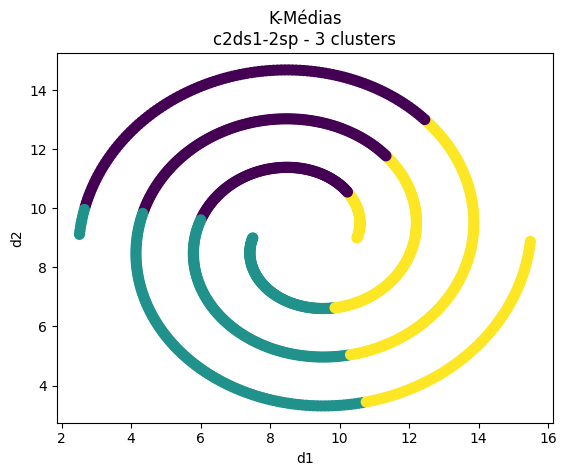

In [3]:
plot_partition(partition='../output/kmeans_c2ds1-2sp.clu', dataset='../datasets/c2ds1-2sp.txt')

In [2]:
adjusted_rand_index(realPartitionPath="../datasets/c2ds1-2spReal.clu", testPartitionPath="../output/kmeans_c2ds1-2sp.clu")

0.04065150073651208